### ランダムフォレスト分類器　(RFC)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import dump

In [4]:
df = pd.read_csv("../cs3-08/heart_disease-mid.csv")
print(df.shape)
print(df.info())
display(df.head())

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HeartDisease     2000 non-null   int64  
 1   BMI              2000 non-null   float64
 2   Smoking          2000 non-null   int64  
 3   AlcoholDrinking  2000 non-null   int64  
 4   Stroke           2000 non-null   int64  
 5   M/F              2000 non-null   object 
 6   AgeCategory      2000 non-null   int64  
 7   GenHealth        2000 non-null   int64  
 8   SleepTime        2000 non-null   float64
dtypes: float64(2), int64(6), object(1)
memory usage: 140.8+ KB
None


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,M/F,AgeCategory,GenHealth,SleepTime
0,0,24.37,0,0,0,M,0,4,7.0
1,0,41.20,0,0,0,F,1,3,7.0
2,0,19.80,0,0,0,M,10,4,6.0
3,0,24.33,1,0,0,M,8,2,8.0
4,0,19.74,0,0,0,F,0,4,8.0


### 特徴量と正解ラベルを分ける

In [7]:
X = df.drop(columns=  "HeartDisease")
y = df["HeartDisease"]
print("X:", X.shape)
display(X.head())
print("y:", y.shape)
print(y.head())

X: (2000, 8)


,BMI,Smoking,AlcoholDrinking,Stroke,M/F,AgeCategory,GenHealth,SleepTime
0,24.37,0,0,0,M,0,4,7.0
1,41.20,0,0,0,F,1,3,7.0
2,19.80,0,0,0,M,10,4,6.0
3,24.33,1,0,0,M,8,2,8.0
4,19.74,0,0,0,F,0,4,8.0


y: (2000,)
0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64


In [8]:
print(y.value_counts())

HeartDisease
0    1000
1    1000
Name: count, dtype: int64


### ダミー変数化

In [9]:
X_dumm = pd.get_dummies(X, drop_first=True, dtype="uint8")
print("X_dumm:", X_dumm.shape)
display(X_dumm.head())

X_dumm: (2000, 8)


,BMI,Smoking,AlcoholDrinking,Stroke,AgeCategory,GenHealth,SleepTime,M/F_M
0,24.37,0,0,0,0,4,7.0,1
1,41.20,0,0,0,1,3,7.0,0
2,19.80,0,0,0,10,4,6.0,1
3,24.33,1,0,0,8,2,8.0,1
4,19.74,0,0,0,0,4,8.0,0


### トレーニングとテストのためにxとyを分割する

X_train, X_test, y_train, y_test = train_test_split(X_dumm, y, test_size=0.3, random_state=7, stratify=y)  
- X_train, X_test: 訓練用、テスト用の特徴データ
- y_train, y_test: 訓練用、テスト用の正解ラベル
  
- 第1引数：全入力データX
- 第2引数：全正解ラベルy
- test_size: テスト用の割合
- random_state: 乱数列を固定
- stratify=y: 元のyの各ラベルの比率を維持するようにtrain/testの分割が行われる

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_dumm, y, test_size=0.3, random_state=7, stratify=y)


In [11]:
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())


print(X_test.shape)
print(y_test.shape)
print(y_test.value_counts())

(1400, 8)
(1400,)
HeartDisease
0    700
1    700
Name: count, dtype: int64
(600, 8)
(600,)
HeartDisease
0    300
1    300
Name: count, dtype: int64


###  RFCのトレーニング

In [12]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=None, random_state=11)  

In [14]:
%%time
rfc.fit(X_train, y_train)

CPU times: total: 984 ms
Wall time: 1.56 s


RandomForestClassifier(n_estimators=500, random_state=11)

### 各特徴量の重要度

In [15]:
ser_fi = pd.Series(rfc.feature_importances_, index=X_train.columns)
print(ser_fi.sort_values(ascending=False))

BMI                0.335083
AgeCategory        0.271956
GenHealth          0.151414
SleepTime          0.117291
Smoking            0.043773
Stroke             0.033244
M/F_M              0.032911
AlcoholDrinking    0.014328
dtype: float64


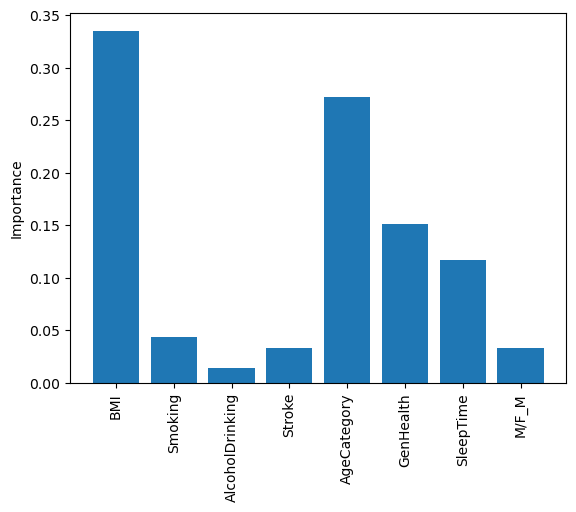

In [16]:
plt.bar(X_train.columns, rfc.feature_importances_)
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

### 予測(訓練データ)

In [17]:
y_train_pred = rfc.predict(X_train)
display(pd.crosstab(y_train, y_train_pred))

col_0,0,1
HeartDisease,,
0,700,0
1,0,700


In [18]:
acc = accuracy_score(y_train, y_train_pred)
print("Accuracy for train data:", acc)

Accuracy for train data: 1.0


### 予測(テストデータ)


In [19]:
y_test_pred = rfc.predict(X_test)
display(pd.crosstab(y_test, y_test_pred))

col_0,0,1
HeartDisease,,
0,229,71
1,92,208


In [1]:
acc = accuracy_score(y_test, y_test_pred)
print("Accuracy for test data:", acc)

NameError: name 'accuracy_score' is not defined

In [21]:
y_test_pred_proba = rfc.predict_proba(X_test)
print(y_test_pred_proba[:10])
print(y_test_pred[:10])

[[0.176 0.824]
 [0.084 0.916]
 [0.416 0.584]
 [0.208 0.792]
 [0.136 0.864]
 [0.108 0.892]
 [0.098 0.902]
 [0.178 0.822]
 [0.638 0.362]
 [0.93  0.07 ]]
[1 1 1 1 1 1 1 1 0 0]


### 学習済みモデルの保存

In [22]:
tag = "heart_disease"
model_file = "rfc_{}.joblib".format(tag)
dump(rfc, model_file)

['rfc_heart_disease.joblib']